In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as sts

In [2]:
# df = pd.read_csv("./patent.tsv", sep="\t", nrows = 500 )
df = pd.read_csv("csv_patent_2019/attorney_agent.csv")

C:\Users\gongl\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,application_number,atty_name_last,atty_name_first,atty_name_middle,atty_name_suffix,atty_phone_number,atty_registration_number,atty_practice_category
0,3831599,Wetzel,James,NaN,NaN,NaN,17686,Attorney
1,3831599,Manzo,Edward,NaN,NaN,312-985-1535,28139,Attorney
2,4003872,Samuel,Richard,NaN,NaN,NaN,24435,Attorney
3,3336080,Ropski,Gary,NaN,NaN,312-321-4216,28257,Attorney
4,3336080,Frankel,William,NaN,NaN,312-321-4200,30337,Attorney


In [4]:
df.columns

df = df.drop(['atty_name_suffix', 'atty_name_middle'], axis=1)
df

,application_number,atty_name_last,atty_name_first,atty_phone_number,atty_registration_number,atty_practice_category
0,3831599,Wetzel,James,NaN,17686,Attorney
1,3831599,Manzo,Edward,312-985-1535,28139,Attorney
2,4003872,Samuel,Richard,NaN,24435,Attorney
3,3336080,Ropski,Gary,312-321-4216,28257,Attorney
4,3336080,Frankel,William,312-321-4200,30337,Attorney
...,...,...,...,...,...,...
224145529,15981088,Kim,Derek,301-655-1473,76635,Agent
224145530,16316883,Kachigian,Mark,918-587-2000,32840,Attorney
224145531,16316883,Tollette,Steven,918--58-7-2000,36949,Attorney
224145532,16316883,Greer,Nicole,918-863-8700,47153,Attorney


In [5]:
df_matching = df[['atty_registration_number', 'atty_name_last', 'atty_name_first', 'atty_practice_category']]
df_matching

,atty_registration_number,atty_name_last,atty_name_first,atty_practice_category
0,17686,Wetzel,James,Attorney
1,28139,Manzo,Edward,Attorney
2,24435,Samuel,Richard,Attorney
3,28257,Ropski,Gary,Attorney
4,30337,Frankel,William,Attorney
...,...,...,...,...
224145529,76635,Kim,Derek,Agent
224145530,32840,Kachigian,Mark,Attorney
224145531,36949,Tollette,Steven,Attorney
224145532,47153,Greer,Nicole,Attorney


In [6]:
# This is index book for all attoneys, no duplicates
df_matching_drop_duplicates = df_matching.drop_duplicates(['atty_registration_number'])
df_matching_drop_duplicates

,atty_registration_number,atty_name_last,atty_name_first,atty_practice_category
0,17686,Wetzel,James,Attorney
1,28139,Manzo,Edward,Attorney
2,24435,Samuel,Richard,Attorney
3,28257,Ropski,Gary,Attorney
4,30337,Frankel,William,Attorney
...,...,...,...,...
223575091,72189,Zhou,Ronghui,Agent
223638565,66068,McCartney,Daniel,Attorney
223689464,75919,Peterson,Mark,Attorney
223797360,76300,Howard,Nicholas,Attorney


In [7]:
# Try to groupby ['atty_name_last', 'atty_name_first']

In [8]:
df.groupby(['atty_name_last', 'atty_name_first']).count().sort_values(['application_number'], ascending = False).head(10)

,,application_number,atty_phone_number,atty_registration_number,atty_practice_category
atty_name_last,atty_name_first,,,,
Chang,Steven,187661,187661,187661,187661
Kim,Grace,187613,187613,187613,187613
Miller,Patrick,180669,180669,180669,180669
Smith,Ryan,179401,179401,179401,179401
Oblon,Norman,172959,172959,172959,172959
Neustadt,Arthur,166309,166309,166309,166309
Kuesters,Eckhard,161830,161830,161830,161830
Pous,Robert,160826,160826,160826,160826
Gholz,Charles,160687,160687,160687,160687


In [9]:
# Use the unique atty_registration_number to perform groupby
# top 5 below all from one company https://www.oblon.com/

In [10]:
df.groupby(['atty_registration_number']).count().sort_values(['application_number'], ascending = False).head(10)

,application_number,atty_name_last,atty_name_first,atty_phone_number,atty_practice_category
atty_registration_number,,,,,
24618,172959,172959,172959,172959,172959
24854,166309,166309,166309,166309,166309
28870,161830,161830,161830,161830,161830
29099,160826,160826,160826,160826,160826
26395,160687,160687,160687,160687,160687
53868,157286,157286,157286,157286,157286
34423,155165,155165,155165,155165,155165
40294,154471,154471,154471,154471,154471
43922,154159,154159,154159,154159,154159


In [11]:
df.groupby(['atty_registration_number']).count()

,application_number,atty_name_last,atty_name_first,atty_phone_number,atty_practice_category
atty_registration_number,,,,,
00050,11,11,11,11,11
00052,11,11,11,11,11
00053,11,11,11,11,11
00054,11,11,11,11,11
10805,1,1,1,0,1
...,...,...,...,...,...
L6337,62,62,62,62,0
L6339,62,62,62,62,0
L6340,62,62,62,62,0


In [12]:
# Verify the top attorneys who applied most cases
df.loc[df["atty_registration_number"] == "24618", :]
# https://www.oblon.com/norman-f-oblon

,application_number,atty_name_last,atty_name_first,atty_phone_number,atty_registration_number,atty_practice_category
1328,9463667,Oblon,Norman,703-413-3000,24618,Attorney
1431,9463386,Oblon,Norman,703-413-3000,24618,Attorney
1502,9581537,Oblon,Norman,703-413-3000,24618,Attorney
1647,9673660,Oblon,Norman,703-413-3000,24618,Attorney
2456,9926463,Oblon,Norman,703-413-3000,24618,Attorney
...,...,...,...,...,...,...
224142354,16466915,Oblon,Norman,703-413-3000,24618,Attorney
224143408,16330243,Oblon,Norman,703-413-3000,24618,Attorney
224143583,16330285,Oblon,Norman,703-413-3000,24618,Attorney
224143656,16330240,Oblon,Norman,703-413-3000,24618,Attorney


In [13]:
# Verify the top attorneys who applied most cases
df.loc[df["atty_registration_number"] == "24854", :]
# https://www.oblon.com/arthur-i-neustadt

,application_number,atty_name_last,atty_name_first,atty_phone_number,atty_registration_number,atty_practice_category
6811,10507683,Neustadt,Arthur,703-413-3000,24854,Attorney
7088,10510774,Neustadt,Arthur,703-413-3000,24854,Attorney
9182,10528413,Neustadt,Arthur,703-413-3000,24854,Attorney
15584,10545806,Neustadt,Arthur,703-413-3000,24854,Attorney
15688,10546329,Neustadt,Arthur,703-413-3000,24854,Attorney
...,...,...,...,...,...,...
224142332,16466915,Neustadt,Arthur,703-413-3000,24854,Attorney
224143409,16330243,Neustadt,Arthur,703-413-3000,24854,Attorney
224143584,16330285,Neustadt,Arthur,703-413-3000,24854,Attorney
224143657,16330240,Neustadt,Arthur,703-413-3000,24854,Attorney


In [14]:
# Verify the top attorneys who applied most cases
df.loc[df["atty_registration_number"] == "28870", :]
# https://www.oblon.com/eckhard-h-kuesters#:~:text=Kuesters%2C%20a%20registered%20patent%20attorney,%2C%20reexamination%2C%20and%20litigation%20support.

,application_number,atty_name_last,atty_name_first,atty_phone_number,atty_registration_number,atty_practice_category
6814,10507683,Kuesters,Eckhard,703-413-3000,28870,Attorney
7091,10510774,Kuesters,Eckhard,703-413-3000,28870,Attorney
9185,10528413,Kuesters,Eckhard,703-413-3000,28870,Attorney
15587,10545806,Kuesters,Eckhard,703-413-3000,28870,Attorney
15691,10546329,Kuesters,Eckhard,703-413-3000,28870,Attorney
...,...,...,...,...,...,...
224142347,16466915,Kuesters,Eckhard,703-413-3000,28870,Attorney
224143412,16330243,Kuesters,Eckhard,703-413-3000,28870,Attorney
224143587,16330285,Kuesters,Eckhard,703-413-3000,28870,Attorney
224143660,16330240,Kuesters,Eckhard,703-413-3000,28870,Attorney


In [15]:
# Verify the top attorneys who applied most cases
df.loc[df["atty_registration_number"] == "29099", :]
# https://www.oblon.com/robert-t-pous

,application_number,atty_name_last,atty_name_first,atty_phone_number,atty_registration_number,atty_practice_category
6815,10507683,Pous,Robert,703-413-3000,29099,Attorney
7092,10510774,Pous,Robert,703-413-3000,29099,Attorney
9186,10528413,Pous,Robert,703-413-3000,29099,Attorney
15588,10545806,Pous,Robert,703-413-3000,29099,Attorney
15692,10546329,Pous,Robert,703-413-3000,29099,Attorney
...,...,...,...,...,...,...
224142310,16466915,Pous,Robert,703-413-3000,29099,Attorney
224143413,16330243,Pous,Robert,703-413-3000,29099,Attorney
224143588,16330285,Pous,Robert,703-413-3000,29099,Attorney
224143661,16330240,Pous,Robert,703-413-3000,29099,Attorney


In [16]:
# Verify the top attorneys who applied most cases
df.loc[df["atty_registration_number"] == "26395", :]
# https://www.oblon.com/charles-l-gholz

,application_number,atty_name_last,atty_name_first,atty_phone_number,atty_registration_number,atty_practice_category
6812,10507683,Gholz,Charles,703-412-6485,26395,Attorney
7089,10510774,Gholz,Charles,703-412-6485,26395,Attorney
9183,10528413,Gholz,Charles,703-412-6485,26395,Attorney
15585,10545806,Gholz,Charles,703-412-6485,26395,Attorney
15689,10546329,Gholz,Charles,703-412-6485,26395,Attorney
...,...,...,...,...,...,...
224142318,16466915,Gholz,Charles,703-412-6485,26395,Attorney
224143410,16330243,Gholz,Charles,703-412-6485,26395,Attorney
224143585,16330285,Gholz,Charles,703-412-6485,26395,Attorney
224143658,16330240,Gholz,Charles,703-412-6485,26395,Attorney


In [17]:
# Verify the top attorneys who applied most cases
df.loc[df["atty_registration_number"] == "53868", :]
# 

,application_number,atty_name_last,atty_name_first,atty_phone_number,atty_registration_number,atty_practice_category
6839,10507683,Wood,David,703-236-2674,53868,Agent
7120,10510774,Wood,David,703-236-2674,53868,Agent
9210,10528413,Wood,David,703-236-2674,53868,Agent
15613,10545806,Wood,David,703-236-2674,53868,Agent
15716,10546329,Wood,David,703-236-2674,53868,Agent
...,...,...,...,...,...,...
224142330,16466915,Wood,David,703-236-2674,53868,Agent
224143437,16330243,Wood,David,703-236-2674,53868,Agent
224143614,16330285,Wood,David,703-236-2674,53868,Agent
224143684,16330240,Wood,David,703-236-2674,53868,Agent


In [18]:
# Focus on patented cases and their attorneys

In [19]:
# attorneys
df.head(10)

,application_number,atty_name_last,atty_name_first,atty_phone_number,atty_registration_number,atty_practice_category
0,3831599,Wetzel,James,NaN,17686,Attorney
1,3831599,Manzo,Edward,312-985-1535,28139,Attorney
2,4003872,Samuel,Richard,NaN,24435,Attorney
3,3336080,Ropski,Gary,312-321-4216,28257,Attorney
4,3336080,Frankel,William,312-321-4200,30337,Attorney
5,3336080,Oberholtzer,Steven,734-302-6030,30670,Attorney
6,3336080,Sobieraj,James,312-321-4200,30805,Attorney
7,3336080,Naughton,James,312-321-4723,30665,Attorney
8,3336080,Daniel,Rodney,312-321-4238,31605,Attorney
9,3336080,Gzybowski,Michael,734-302-6000,32816,Attorney


In [20]:
# patented cases
application_cleaned_patented = pd.read_csv("csv_output/application_cleaned_patented.csv")
application_cleaned_patented.head(5)

C:\Users\gongl\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,6,7,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
0,3,2045760,1948-08-23,NaN,NaN,NaN,NaN,NaN,NaN,Patented File - (Old Case Added for File Track...,1986-04-25,FILE REPOSITORY (FRANCONIA),1986-08-11,NaN,NaN,2480888,1949-09-06,BOX STAYING MACHINE,UNDISCOUNTED
1,4,2048602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Patented File - (Old Case Added for File Track...,1984-03-22,FILE REPOSITORY (FRANCONIA),2018-11-06,NaN,NaN,RE19792,1935-12-17,NaN,UNDISCOUNTED
2,7,2107244,1936-10-23,Utility,"GREGORY, BERNARR E",3662,380,026000,NaN,Patented Case,2000-09-20,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,6130946,2000-10-10,NaN,UNDISCOUNTED
3,8,2122612,1937-01-27,NaN,NaN,NaN,000,000000,NaN,Patented File - (Old Case Added for File Track...,1992-10-13,FILE REPOSITORY (FRANCONIA),1993-03-16,NaN,NaN,2107431,1938-02-08,ANTISKID CROSS CHAINS,UNDISCOUNTED
4,9,2122769,1949-10-21,NaN,NaN,NaN,NaN,NaN,NaN,Patented File - (Old Case Added for File Track...,1987-11-04,FILE REPOSITORY (FRANCONIA),1988-05-03,NaN,NaN,2708722,1955-01-13,NaN,UNDISCOUNTED


In [21]:
# Have an inner merge for two DataFrame df and application_cleaned_patented above
df_patented = pd.merge(df, application_cleaned_patented, on=["application_number"])
df_patented.head(5)

,application_number,atty_name_last,atty_name_first,atty_phone_number,atty_registration_number,atty_practice_category,Unnamed: 0,filing_date,application_invention_type,examiner_full_name,...,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
0,3831599,Wetzel,James,NaN,17686,Attorney,217,NaN,NaN,NaN,...,Patented File - (Old Case Added for File Track...,1981-04-07,FILE REPOSITORY (FRANCONIA),2008-01-24,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
1,3831599,Manzo,Edward,312-985-1535,28139,Attorney,217,NaN,NaN,NaN,...,Patented File - (Old Case Added for File Track...,1981-04-07,FILE REPOSITORY (FRANCONIA),2008-01-24,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
2,4003872,Samuel,Richard,NaN,24435,Attorney,235,NaN,NaN,NaN,...,Patented File - (Old Case Added for File Track...,1983-01-12,FILE REPOSITORY (FRANCONIA),2008-01-30,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
3,3336080,Ropski,Gary,312-321-4216,28257,Attorney,85,NaN,NaN,NaN,...,Patented File - (Old Case Added for File Track...,1981-04-07,FILE REPOSITORY (FRANCONIA),2007-05-07,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
4,3336080,Frankel,William,312-321-4200,30337,Attorney,85,NaN,NaN,NaN,...,Patented File - (Old Case Added for File Track...,1981-04-07,FILE REPOSITORY (FRANCONIA),2007-05-07,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED


In [22]:
df_patented.count()

application_number            15505716
atty_name_last                15505716
atty_name_first               15505716
atty_phone_number             13783153
atty_registration_number      15505716
atty_practice_category        15417322
Unnamed: 0                    15505716
filing_date                   15504741
application_invention_type    15505585
examiner_full_name            15405835
examiner_art_unit             15504999
uspc_class                    15504864
uspc_subclass                 15504735
atty_docket_number            14511814
appl_status_desc              15505716
appl_status_date              15505716
file_location                 15505716
file_location_date            13944379
earliest_pgpub_number          1286019
earliest_pgpub_date            1286019
patent_number                 15505012
patent_issue_date             15505012
invention_title               15504696
small_entity_indicator        15505687
dtype: int64

In [23]:
# some applicatons may not have been logged with their attorney info

In [24]:
df_patented_att = df_patented.groupby(['atty_registration_number']).count().sort_values(['application_number'], ascending = False)
df_patented_att = df_patented_att.reset_index()
df_patented_att = df_patented_att[['atty_registration_number', 'application_number']]
df_patented_att = df_patented_att.rename(columns = {'application_number':'application_number_patented'})
df_patented_att.head()

,atty_registration_number,application_number_patented
0,24618,20700
1,24854,19322
2,18879,18793
3,29836,18296
4,31865,17705


In [25]:
# Focus on all application cases and their attorneys

In [26]:
# all application cases
application_cleaned = pd.read_csv("csv_output/application_cleaned.csv")
application_cleaned.head(5)

C:\Users\gongl\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,2,4,5,6,7,8,9,10,12,13,14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
0,0,2000161,NaN,Utility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING,2000-01-21,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
1,1,2022946,NaN,Utility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING,2000-01-21,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
2,2,2032617,NaN,Utility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISSING,2000-01-21,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
3,3,2045760,1948-08-23,NaN,NaN,NaN,NaN,NaN,NaN,Patented File - (Old Case Added for File Track...,1986-04-25,FILE REPOSITORY (FRANCONIA),1986-08-11,NaN,NaN,2480888,1949-09-06,BOX STAYING MACHINE,UNDISCOUNTED
4,4,2048602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Patented File - (Old Case Added for File Track...,1984-03-22,FILE REPOSITORY (FRANCONIA),2018-11-06,NaN,NaN,RE19792,1935-12-17,NaN,UNDISCOUNTED


In [27]:
# Have an inner merge for two DataFrame df and application_cleaned above
df_all = pd.merge(df, application_cleaned, on=["application_number"])
df_all.head(5)

,application_number,atty_name_last,atty_name_first,atty_phone_number,atty_registration_number,atty_practice_category,Unnamed: 0,filing_date,application_invention_type,examiner_full_name,...,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
0,3831599,Wetzel,James,NaN,17686,Attorney,217,NaN,NaN,NaN,...,Patented File - (Old Case Added for File Track...,1981-04-07,FILE REPOSITORY (FRANCONIA),2008-01-24,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
1,3831599,Manzo,Edward,312-985-1535,28139,Attorney,217,NaN,NaN,NaN,...,Patented File - (Old Case Added for File Track...,1981-04-07,FILE REPOSITORY (FRANCONIA),2008-01-24,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
2,4003872,Samuel,Richard,NaN,24435,Attorney,235,NaN,NaN,NaN,...,Patented File - (Old Case Added for File Track...,1983-01-12,FILE REPOSITORY (FRANCONIA),2008-01-30,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
3,3336080,Ropski,Gary,312-321-4216,28257,Attorney,85,NaN,NaN,NaN,...,Patented File - (Old Case Added for File Track...,1981-04-07,FILE REPOSITORY (FRANCONIA),2007-05-07,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
4,3336080,Frankel,William,312-321-4200,30337,Attorney,85,NaN,NaN,NaN,...,Patented File - (Old Case Added for File Track...,1981-04-07,FILE REPOSITORY (FRANCONIA),2007-05-07,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED


In [28]:
df_all_att = df_all.groupby(['atty_registration_number']).count().sort_values(['application_number'], ascending = False)
df_all_att = df_all_att.reset_index()
df_all_att = df_all_att[['atty_registration_number', 'application_number']]
df_all_att = df_all_att.rename(columns = {'application_number':'application_number_all'})
df_all_att.head()

,atty_registration_number,application_number_all
0,24618,46898
1,24854,41287
2,18879,37388
3,28870,35928
4,26395,35669


In [29]:
# Have an inner merge for two DataFrame df_patented_att and df_all_att above

In [30]:
df_success = pd.merge(df_patented_att, df_all_att, on=["atty_registration_number"])
df_success

,atty_registration_number,application_number_patented,application_number_all
0,24618,20700,46898
1,24854,19322,41287
2,18879,18793,37388
3,29836,18296,28789
4,31865,17705,29676
...,...,...,...
39858,68830,1,1
39859,39214,1,1
39860,39158,1,2
39861,39154,1,4


In [31]:
df_success['success_rate'] = df_success['application_number_patented'] / df_success['application_number_all']

df_success['success_rate'].astype(float)

df_success = df_success.sort_values(["success_rate"], ascending = False)
df_success['success_rate'] = df_success['success_rate'].map("{:.4%}".format)
df_success.head()

,atty_registration_number,application_number_patented,application_number_all,success_rate
39862,L6343,1,1,100.0000%
35987,74878,2,2,100.0000%
35962,31047,2,2,100.0000%
39021,70358,1,1,100.0000%
35966,52592,2,2,100.0000%


In [32]:
df_success['success_rate'].head()

39862    100.0000%
35987    100.0000%
35962    100.0000%
39021    100.0000%
35966    100.0000%
Name: success_rate, dtype: object

In [33]:
df_success['success_rate'] = df_success['success_rate'].map(lambda x: x.rstrip('%'))
df_success['success_rate'] = pd.to_numeric(df_success['success_rate'])

In [34]:
df_success.dtypes

atty_registration_number        object
application_number_patented      int64
application_number_all           int64
success_rate                   float64
dtype: object

In [35]:
df_success['success_rate']

39862    100.0000
35987    100.0000
35962    100.0000
39021    100.0000
35966    100.0000
           ...   
37666      1.8519
21909      1.8243
39116      1.4286
28778      0.9115
29140      0.6118
Name: success_rate, Length: 39863, dtype: float64

In [36]:
df_success

,atty_registration_number,application_number_patented,application_number_all,success_rate
39862,L6343,1,1,100.0000
35987,74878,2,2,100.0000
35962,31047,2,2,100.0000
39021,70358,1,1,100.0000
35966,52592,2,2,100.0000
...,...,...,...,...
37666,15632,1,54,1.8519
21909,17356,54,2960,1.8243
39116,35770,1,70,1.4286
28778,31310,14,1536,0.9115


In [37]:
df_matching_drop_duplicates

,atty_registration_number,atty_name_last,atty_name_first,atty_practice_category
0,17686,Wetzel,James,Attorney
1,28139,Manzo,Edward,Attorney
2,24435,Samuel,Richard,Attorney
3,28257,Ropski,Gary,Attorney
4,30337,Frankel,William,Attorney
...,...,...,...,...
223575091,72189,Zhou,Ronghui,Agent
223638565,66068,McCartney,Daniel,Attorney
223689464,75919,Peterson,Mark,Attorney
223797360,76300,Howard,Nicholas,Attorney


In [38]:
df_matching_drop_duplicates.loc[df_matching_drop_duplicates['atty_registration_number'] == "22057", :]

,atty_registration_number,atty_name_last,atty_name_first,atty_practice_category
1109,22057,West,William,Attorney


In [39]:
df_matching_drop_duplicates.loc[df_matching_drop_duplicates['atty_registration_number'] == "25512", :]

,atty_registration_number,atty_name_last,atty_name_first,atty_practice_category
8009,25512,Razzano,Pasquale,Attorney


In [40]:
# Have an inner merge for two DataFrame df_success and df_matching_drop_duplicates to bring in detailed attorney info

In [41]:
df_success_withnames = pd.merge(df_success, df_matching_drop_duplicates, how='inner', on=['atty_registration_number'])
df_success_withnames

,atty_registration_number,application_number_patented,application_number_all,success_rate,atty_name_last,atty_name_first,atty_practice_category
0,L6343,1,1,100.0000,Owan,Cory,NaN
1,74878,2,2,100.0000,Wu,David,Agent
2,31047,2,2,100.0000,Nicolaides,Mary,Attorney
3,70358,1,1,100.0000,Matty,Brian,Agent
4,52592,2,2,100.0000,Lyons,Melissa,Attorney
...,...,...,...,...,...,...,...
39858,15632,1,54,1.8519,Oberheim,Earnest,Agent
39859,17356,54,2960,1.8243,Cella,John,Attorney
39860,35770,1,70,1.4286,Bashore,Alain,Agent
39861,31310,14,1536,0.9115,Tegfeldt,Jennifer,Attorney


In [42]:
# # Create database connection
# rds_connection_string = "postgres:useyourpassword@localhost:5432/ETL_USPTO"
# engine = create_engine(f'postgresql://{rds_connection_string}')

In [43]:
# # Confirm tables
# engine.table_names()

In [44]:
# # Load DataFrames into database
# df_success_withnames.to_sql(name='attorney_success_withnames', con=engine, if_exists='append', index=True)

In [45]:
# df_success_withnames_read = pd.read_sql_query('select * from attorney_success_withnames', con=engine)

In [46]:
# df_success_withnames_read

In [47]:
df_success_oblon = df_success_withnames.loc[(df_success_withnames["atty_registration_number"] == "24618") 
               | (df_success_withnames["atty_registration_number"] == "24854") 
               | (df_success_withnames["atty_registration_number"] == "28870") 
               | (df_success_withnames["atty_registration_number"] == "29099") 
               | (df_success_withnames["atty_registration_number"] == "26395"), :]
df_success_oblon

,atty_registration_number,application_number_patented,application_number_all,success_rate,atty_name_last,atty_name_first,atty_practice_category
23733,26395,16830,35669,47.1838,Gholz,Charles,Attorney
23851,29099,16773,35659,47.0372,Pous,Robert,Attorney
24000,28870,16832,35928,46.8493,Kuesters,Eckhard,Attorney
24034,24854,19322,41287,46.7992,Neustadt,Arthur,Attorney
26428,24618,20700,46898,44.1383,Oblon,Norman,Attorney


In [48]:
# df_success.sort_values(['application_number_all'], ascending = False).head(100)
df_success.sort_values(['application_number_all'], ascending = False).iloc[:100, :].reset_index(drop = True)

,atty_registration_number,application_number_patented,application_number_all,success_rate
0,24618,20700,46898,44.1383
1,24854,19322,41287,46.7992
2,18879,18793,37388,50.2648
3,28870,16832,35928,46.8493
4,26395,16830,35669,47.1838
...,...,...,...,...
95,78158,15318,27353,56.0012
96,77571,15316,27353,55.9939
97,76122,15315,27352,55.9922
98,61377,15315,27351,55.9943


In [49]:
df_success_top = df_success.sort_values(['application_number_all'], ascending = False).iloc[:100, :].reset_index(drop = True)
df_success_top

,atty_registration_number,application_number_patented,application_number_all,success_rate
0,24618,20700,46898,44.1383
1,24854,19322,41287,46.7992
2,18879,18793,37388,50.2648
3,28870,16832,35928,46.8493
4,26395,16830,35669,47.1838
...,...,...,...,...
95,78158,15318,27353,56.0012
96,77571,15316,27353,55.9939
97,76122,15315,27352,55.9922
98,61377,15315,27351,55.9943


In [50]:
df_success_top['success_rate'].mean()

55.33650500000005

In [51]:
df_success_top['success_rate'].median()

55.993

In [52]:
len(df_success_top['application_number_all'])

100

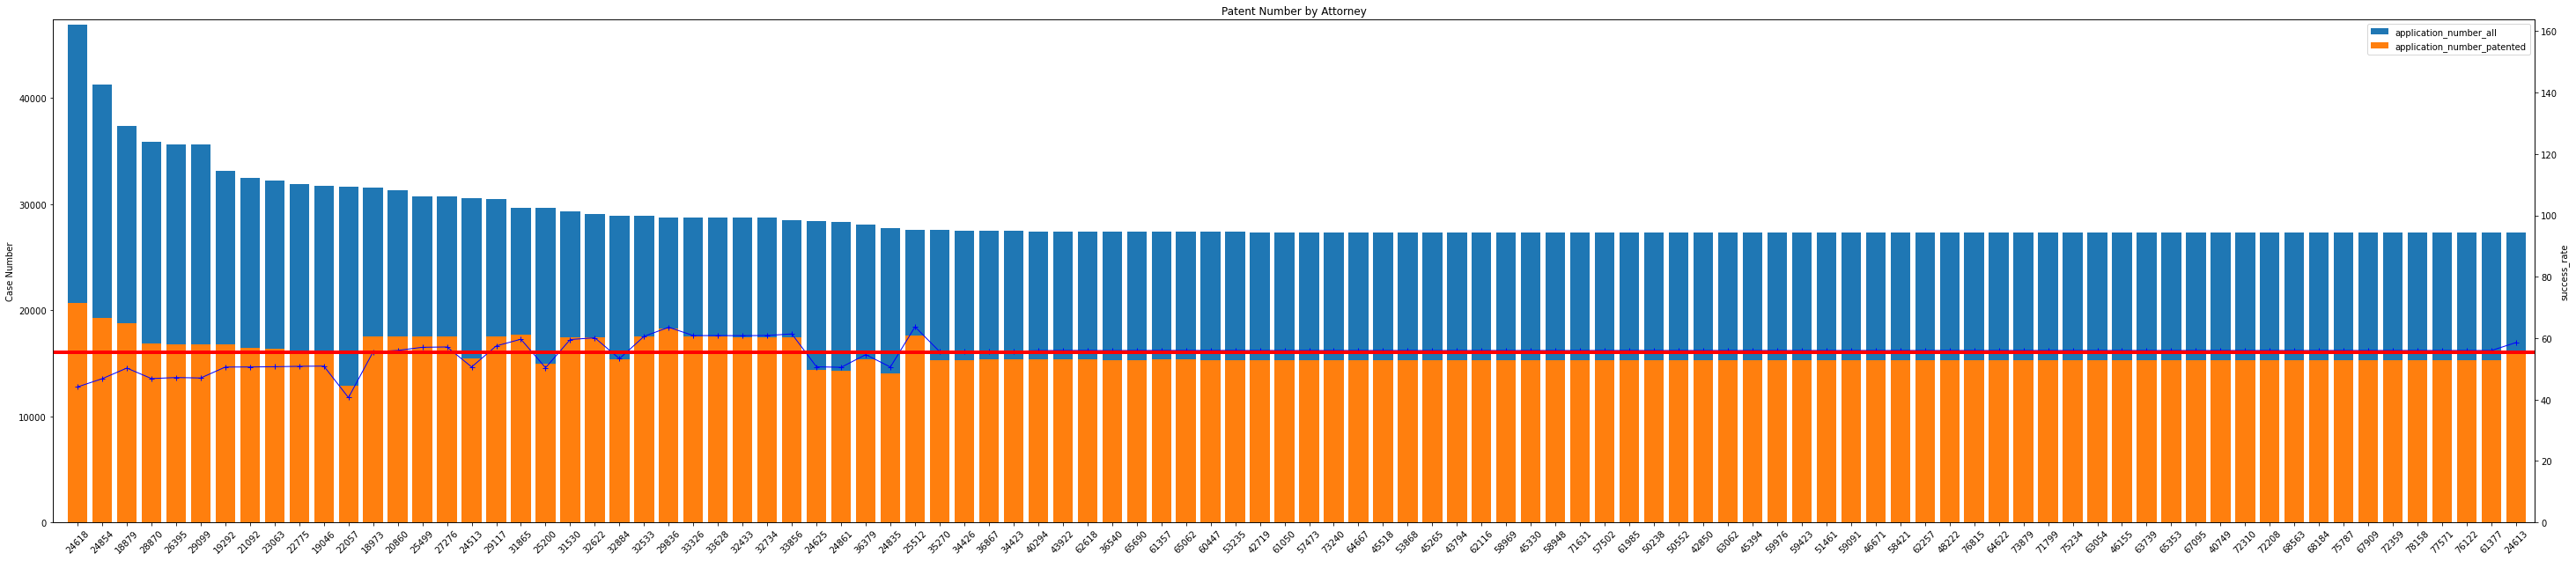

In [53]:
x_axis = np.arange(len(df_success_top['application_number_all']))

fig, ax = plt.subplots()

ax.bar(x_axis, df_success_top['application_number_all'], label='application_number_all')
ax.bar(x_axis, df_success_top['application_number_patented'], bottom=0,
       label='application_number_patented')


plt.xticks(x_axis, df_success_top['atty_registration_number'], rotation=45)


ax.set_ylabel('Case Number')
ax.set_title('Patent Number by Attorney')
ax.legend()


fig = plt.gcf()
fig.set_size_inches(50.5, 10.5)

plt.xlim(-1, len(x_axis)-0.25)
plt.ylim(0, max(df_success_top['application_number_all'])+500)



axes2 = plt.twinx()
axes2.plot(x_axis, df_success_top['success_rate'], marker="+",color="blue", linewidth=1, label="success_rate")
fig1 = plt.gcf()
axes2.set_ylim(0, max(df_success_top['success_rate'])+100)
axes2.set_ylabel('success_rate')

plt.axhline(y=df_success_top['success_rate'].mean(), color='r', linestyle='solid', linewidth = 4)
# plt.hlines(df_success_top['success_rate'].mean(), colors=red, linestyles='solid', label='', *, data=None, **kwargs)[source]

fig.savefig('success_rate_1', dpi=100)

plt.show()

In [54]:
# Below I would like to research into/set up a DataFrame to see under each uspc_class, which attorney has the highest success rate!

In [55]:
df_patented.head(5)
# df_patented['appl_status_desc'].value_counts()

,application_number,atty_name_last,atty_name_first,atty_phone_number,atty_registration_number,atty_practice_category,Unnamed: 0,filing_date,application_invention_type,examiner_full_name,...,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
0,3831599,Wetzel,James,NaN,17686,Attorney,217,NaN,NaN,NaN,...,Patented File - (Old Case Added for File Track...,1981-04-07,FILE REPOSITORY (FRANCONIA),2008-01-24,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
1,3831599,Manzo,Edward,312-985-1535,28139,Attorney,217,NaN,NaN,NaN,...,Patented File - (Old Case Added for File Track...,1981-04-07,FILE REPOSITORY (FRANCONIA),2008-01-24,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
2,4003872,Samuel,Richard,NaN,24435,Attorney,235,NaN,NaN,NaN,...,Patented File - (Old Case Added for File Track...,1983-01-12,FILE REPOSITORY (FRANCONIA),2008-01-30,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
3,3336080,Ropski,Gary,312-321-4216,28257,Attorney,85,NaN,NaN,NaN,...,Patented File - (Old Case Added for File Track...,1981-04-07,FILE REPOSITORY (FRANCONIA),2007-05-07,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
4,3336080,Frankel,William,312-321-4200,30337,Attorney,85,NaN,NaN,NaN,...,Patented File - (Old Case Added for File Track...,1981-04-07,FILE REPOSITORY (FRANCONIA),2007-05-07,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED


In [56]:
df_patented_groupbyclassandatt = df_patented.groupby(['uspc_class', 'atty_registration_number'])
df_patented_groupbyclassandatt.count()

application_number  atty_name_last  \
uspc_class atty_registration_number                                       
2.0        24726                                      1               1   
           25124                                      1               1   
           25726                                      1               1   
           26519                                      1               1   
           27394                                      1               1   
...                                                 ...             ...   
XXX        L1076                                      1               1   
           L1148                                      1               1   
           L1237                                      1               1   
           L1257                                      1               1   
           L1270                                      1               1   

                                     atty_name_first  atty_phone_number  \
uspc_class atty_registration_number                                       
2.0        24726                                   1                  1   
           25124                                   1                  1   
           25726                                   1                  1   
           26519                                   1                  1   
           27394                                   1                  1   
...                                              ...                ...   
XXX        L1076                                   1                  0   
           L1148                                   1                  1   
           L1237                                   1                  1   
           L1257                                   1                  1   
           L1270                                   1                  1   

                                     atty_practice_category  Unnamed: 0  \
uspc_class atty_registration_number                                       
2.0        24726                                          1           1   
           25124                                          1           1   
           25726                                          1           1   
           26519                                          1           1   
           27394                                          1           1   
...                                                     ...         ...   
XXX        L1076                                          0           1   
           L1148                                          0           1   
           L1237                                          0           1   
           L1257                                          0           1   
           L1270                                          0           1   

                                     filing_date  application_invention_type  \
uspc_class atty_registration_number                                            
2.0        24726                               1                           1   
           25124                               1                           1   
           25726                               1                           1   
           26519                               1                           1   
           27394                               1                           1   
...                                          ...                         ...   
XXX        L1076                               1                           1   
           L1148                               1                           1   
           L1237                               1                           1   
           L1257                               1                           1   
           L1270                               1                           1   

                                     examiner_full_name  examiner_ar

In [57]:
df_patented_groupbyclassandatt_focus = pd.DataFrame(df_patented_groupbyclassandatt['application_number'].count())
df_patented_groupbyclassandatt_focus = df_patented_groupbyclassandatt_focus.reset_index()
df_patented_groupbyclassandatt_focus = df_patented_groupbyclassandatt_focus.rename(columns = {'application_number':'application_number_patented'})
df_patented_groupbyclassandatt_focus.sort_values(['application_number_patented'], ascending = False).head(10)

,uspc_class,atty_registration_number,application_number_patented
1855915,430,18879,1763
1855945,430,19046,1548
1855995,430,19292,1510
1856332,430,21092,1476
1856720,430,24513,1467
1856512,430,22775,1447
1856576,430,23063,1446
1392359,358,25512,1443
1394064,358,31865,1443
1393507,358,29836,1442


In [58]:
df_all.head(5)
# df_all['appl_status_desc'].value_counts()

,application_number,atty_name_last,atty_name_first,atty_phone_number,atty_registration_number,atty_practice_category,Unnamed: 0,filing_date,application_invention_type,examiner_full_name,...,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
0,3831599,Wetzel,James,NaN,17686,Attorney,217,NaN,NaN,NaN,...,Patented File - (Old Case Added for File Track...,1981-04-07,FILE REPOSITORY (FRANCONIA),2008-01-24,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
1,3831599,Manzo,Edward,312-985-1535,28139,Attorney,217,NaN,NaN,NaN,...,Patented File - (Old Case Added for File Track...,1981-04-07,FILE REPOSITORY (FRANCONIA),2008-01-24,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
2,4003872,Samuel,Richard,NaN,24435,Attorney,235,NaN,NaN,NaN,...,Patented File - (Old Case Added for File Track...,1983-01-12,FILE REPOSITORY (FRANCONIA),2008-01-30,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
3,3336080,Ropski,Gary,312-321-4216,28257,Attorney,85,NaN,NaN,NaN,...,Patented File - (Old Case Added for File Track...,1981-04-07,FILE REPOSITORY (FRANCONIA),2007-05-07,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED
4,3336080,Frankel,William,312-321-4200,30337,Attorney,85,NaN,NaN,NaN,...,Patented File - (Old Case Added for File Track...,1981-04-07,FILE REPOSITORY (FRANCONIA),2007-05-07,NaN,NaN,NaN,NaN,NaN,UNDISCOUNTED


In [59]:
df_all_groupbyclassandatt = df_all.groupby(['uspc_class', 'atty_registration_number'])
df_all_groupbyclassandatt.count()

application_number  atty_name_last  \
uspc_class atty_registration_number                                       
2.0        17283                                      1               1   
           18879                                      1               1   
           20435                                      1               1   
           20910                                      1               1   
           22620                                      1               1   
...                                                 ...             ...   
XXX        L1076                                      1               1   
           L1148                                      1               1   
           L1237                                      1               1   
           L1257                                      1               1   
           L1270                                      1               1   

                                     atty_name_first  atty_phone_number  \
uspc_class atty_registration_number                                       
2.0        17283                                   1                  1   
           18879                                   1                  1   
           20435                                   1                  0   
           20910                                   1                  0   
           22620                                   1                  1   
...                                              ...                ...   
XXX        L1076                                   1                  0   
           L1148                                   1                  1   
           L1237                                   1                  1   
           L1257                                   1                  1   
           L1270                                   1                  1   

                                     atty_practice_category  Unnamed: 0  \
uspc_class atty_registration_number                                       
2.0        17283                                          1           1   
           18879                                          1           1   
           20435                                          1           1   
           20910                                          1           1   
           22620                                          1           1   
...                                                     ...         ...   
XXX        L1076                                          0           1   
           L1148                                          0           1   
           L1237                                          0           1   
           L1257                                          0           1   
           L1270                                          0           1   

                                     filing_date  application_invention_type  \
uspc_class atty_registration_number                                            
2.0        17283                               1                           1   
           18879                               1                           1   
           20435                               1                           1   
           20910                               1                           1   
           22620                               1                           1   
...                                          ...                         ...   
XXX        L1076                               1                           1   
           L1148                               1                           1   
           L1237                               1                           1   
           L1257                               1                           1   
           L1270                               1                           1   

                                     examiner_full_name  examiner_ar

In [60]:
df_all_groupbyclassandatt_focus = pd.DataFrame(df_all_groupbyclassandatt['application_number'].count())
df_all_groupbyclassandatt_focus = df_all_groupbyclassandatt_focus.reset_index()
df_all_groupbyclassandatt_focus = df_all_groupbyclassandatt_focus.rename(columns = {'application_number':'application_number_all'})
df_all_groupbyclassandatt_focus.sort_values(['application_number_all'], ascending = False).head(10)

,uspc_class,atty_registration_number,application_number_all
2799353,430,18879,2842
2801564,430,27678,2566
2180135,358,18973,2558
2180680,358,20860,2509
2799391,430,19046,2504
2799459,430,19292,2485
2181650,358,25499,2471
2805009,430,36484,2471
2803800,430,33324,2465
2809588,430,64579,2464


In [61]:
# Inner merge two DataFrame above df_patented_groupbyclassandatt_focus and df_all_groupbyclassandatt_focus

In [62]:
df_groupbyclassandatt_focus = pd.merge(df_patented_groupbyclassandatt_focus, df_all_groupbyclassandatt_focus, how='inner', on=['uspc_class', 'atty_registration_number'])
df_groupbyclassandatt_focus
df_groupbyclassandatt_focus['success_rate'] = df_groupbyclassandatt_focus['application_number_patented'] / df_groupbyclassandatt_focus['application_number_all']
df_groupbyclassandatt_focus

,uspc_class,atty_registration_number,application_number_patented,application_number_all,success_rate
0,2,24726,1,1,1.0
1,2,25124,1,2,0.5
2,2,25726,1,2,0.5
3,2,26519,1,1,1.0
4,2,27394,1,1,1.0
...,...,...,...,...,...
2600028,XXX,L1076,1,1,1.0
2600029,XXX,L1148,1,1,1.0
2600030,XXX,L1237,1,1,1.0
2600031,XXX,L1257,1,1,1.0


In [63]:
# Testing to make sure merge above was correct
df_groupbyclassandatt_focus.loc[(df_groupbyclassandatt_focus['atty_registration_number'] == "18879") & (df_groupbyclassandatt_focus['uspc_class'] == "430"), :]

,uspc_class,atty_registration_number,application_number_patented,application_number_all,success_rate
1791651,430,18879,1763,2842,0.620338


In [64]:
# Testing to make sure merge above was correct
df_groupbyclassandatt_focus.loc[df_groupbyclassandatt_focus['uspc_class'] == "430", :].sort_values(['application_number_all'], ascending = False)

,uspc_class,atty_registration_number,application_number_patented,application_number_all,success_rate
1791651,430,18879,1763,2842,0.620338
1793194,430,27678,882,2566,0.343726
1791681,430,19046,1548,2504,0.618211
1791731,430,19292,1510,2485,0.607646
1795526,430,36484,874,2471,0.353703
...,...,...,...,...,...
1799052,430,67997,1,1,1.000000
1792071,430,21096,1,1,1.000000
1796523,430,41455,1,1,1.000000
1797544,430,51489,1,1,1.000000


In [65]:
# Bring back attorney info
df_matching_drop_duplicates

,atty_registration_number,atty_name_last,atty_name_first,atty_practice_category
0,17686,Wetzel,James,Attorney
1,28139,Manzo,Edward,Attorney
2,24435,Samuel,Richard,Attorney
3,28257,Ropski,Gary,Attorney
4,30337,Frankel,William,Attorney
...,...,...,...,...
223575091,72189,Zhou,Ronghui,Agent
223638565,66068,McCartney,Daniel,Attorney
223689464,75919,Peterson,Mark,Attorney
223797360,76300,Howard,Nicholas,Attorney


In [66]:
# Inner merge two DataFrame above df_groupbyclassandatt_focus and df_matching_drop_duplicates
df_groupbyclassandatt_focus_withnames = pd.merge(df_groupbyclassandatt_focus, df_matching_drop_duplicates, how='inner', on=['atty_registration_number'])
df_groupbyclassandatt_focus_withnames

,uspc_class,atty_registration_number,application_number_patented,application_number_all,success_rate,atty_name_last,atty_name_first,atty_practice_category
0,2,24726,1,1,1.0,Greive,Edward,Attorney
1,336,24726,2,2,1.0,Greive,Edward,Attorney
2,442,24726,1,1,1.0,Greive,Edward,Attorney
3,522,24726,1,1,1.0,Greive,Edward,Attorney
4,704,24726,1,1,1.0,Greive,Edward,Attorney
...,...,...,...,...,...,...,...,...
2600028,PLT,39412,1,1,1.0,Wainwright,David,Agent
2600029,PLT,41866,1,1,1.0,Ishimoto,Lance,Attorney
2600030,PLT,56320,1,1,1.0,Charles,Audrey,Agent
2600031,PLT,66413,5,5,1.0,Bright,Cassandra,Agent


In [67]:
df_groupbyclassandatt_focus_withnames.dtypes

uspc_class                      object
atty_registration_number        object
application_number_patented      int64
application_number_all           int64
success_rate                   float64
atty_name_last                  object
atty_name_first                 object
atty_practice_category          object
dtype: object

In [68]:
df_success_withnames.head(10)

,atty_registration_number,application_number_patented,application_number_all,success_rate,atty_name_last,atty_name_first,atty_practice_category
0,L6343,1,1,100.0,Owan,Cory,NaN
1,74878,2,2,100.0,Wu,David,Agent
2,31047,2,2,100.0,Nicolaides,Mary,Attorney
3,70358,1,1,100.0,Matty,Brian,Agent
4,52592,2,2,100.0,Lyons,Melissa,Attorney
5,42493,2,2,100.0,Donoghue,Robert,Attorney
6,12904,2,2,100.0,Leonard,John,Attorney
7,61132,2,2,100.0,Orr,Celina,Attorney
8,46265,2,2,100.0,Nemeth,Karen,Attorney
9,36339,1,1,100.0,Lee,Vivien,Attorney


In [69]:
df_success_withnames.dtypes

atty_registration_number        object
application_number_patented      int64
application_number_all           int64
success_rate                   float64
atty_name_last                  object
atty_name_first                 object
atty_practice_category          object
dtype: object

In [70]:
from sqlalchemy import create_engine

In [71]:
# Create database connection
rds_connection_string = "postgres:useyourpassword@localhost:5432/ETL_USPTO"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [72]:
# Confirm tables
engine.table_names()

['patent_claims_stats',
 'uspc_class_all',
 'uspc_class_daysandrate',
 'application_cleaned_all',
 'application_cleaned_patented',
 'all_inventors',
 'uspc_attorney_success_withnames',
 'attorney_success_withnames']

In [ ]:
# Load DataFrames into database
df_success_withnames.to_sql(name='attorney_success_withnames', con=engine, if_exists='append', index=False)

In [ ]:
# df_success_withnames_read = pd.read_sql_query('select * from attorney_success_withnames', con=engine)

In [ ]:
# df_success_withnames_read

In [74]:
df_groupbyclassandatt_focus_withnames.to_sql(name='uspc_attorney_success_withnames', con=engine, if_exists='append', index=False)

In [ ]:
# df_groupbyclassandatt_focus_withnames_read = pd.read_sql_query('select * from uspc_attorney_success_withnames', con=engine)

In [ ]:
# df_groupbyclassandatt_focus_withnames_read

In [ ]:
# Testing to make sure merge above was correct
df_groupbyclassandatt_focus_withnames.loc[(df_groupbyclassandatt_focus_withnames['atty_registration_number'] == "18879") & (df_groupbyclassandatt_focus_withnames['uspc_class'] == "430"), :]

In [ ]:
# Testing to make sure merge above was correct
df_groupbyclassandatt_focus_withnames.loc[df_groupbyclassandatt_focus_withnames['uspc_class'] == "430", :].sort_values(['application_number_all'], ascending = False)

In [ ]:
# MAKE AN APP: I am interested in finding the uspc_class X. 074 is Machine element or mechanism
my_interest = "074"

In [ ]:
df_groupbyclassandatt_focus_withnames.loc[df_groupbyclassandatt_focus_withnames['uspc_class'] == my_interest, :].sort_values(['application_number_all'], ascending = False)

In [ ]:
# Even though Schwartz has fewer total application cases, he has 10% higher success rate than Oblon. And of course Oblon is much more famous. Data speaks – I would go for Schwartz. 

In [ ]:
!dir